In [72]:
#Code to Read and Preview SMS Spam Collection Data 
name=r"C:\Users\istm\OneDrive - Ramboll\Desktop\ISHANT\Computer science\quant\linkedin#\NLL\Ex_Files_NLP_Python_ML_EssT\Ex_Files_NLP_Python_ML_EssT\Exercise Files\Ch01\01_03\Start\SMSSpamCollection.tsv"
rawdata=open(name).read()
rawdata[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [54]:
#Loading and Preparing SMS Spam Collection Data for NLP Processing
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv(name, sep='\t')
data = pd.read_csv(name, sep='\t')
data.columns = ['label', 'body_text']

In [55]:
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [56]:
#Text Cleaning Function for NLP Preprocessing
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords] # same as count vector unlike n gram vector.
    return text

In [59]:
# Creating Feature number 1 that is Text Lengths for SMS Spam Detection
data['body_len']=data['body_text'].apply(lambda x:len(x)-x.count(" ") ) # remove white spces
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


In [60]:
# Creating Feature number 2 that is number of punctuations for SMS Spam Detection
import string 
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    # returning 1 if the char is punct there for using (in) not (not in) 
    return round(count/(len(text)-text.count(" ")),3)*100
    
data['punct %']=data['body_text'].apply(lambda x:count_punct(x))
data.head()


,label,body_text,body_len,punct %
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


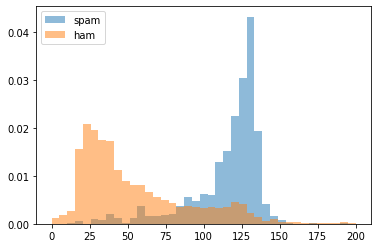

In [61]:
#Visualizing SMS Length Distribution for Spam vs. Ham Messages
from matplotlib import pyplot
import numpy as np
bins=np.linspace(0,200,40) 
pyplot.hist(data[data['label']=='spam']['body_len'],bins,alpha=0.5,density = True,label='spam') 
#ham histo will dwarf the spam one if we not normalize as one is alot more in number compared to other 
pyplot.hist(data[data['label']=='ham']['body_len'],bins,alpha=0.5,density = True,label='ham')
pyplot.legend(loc='upper left')
pyplot.show() # spam appeared to be longer than regular text messages


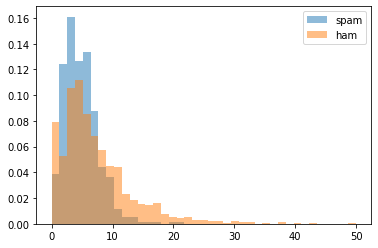

In [62]:
#Visualizing Percentage punctuation Distribution for Spam vs. Ham Messages
bins=np.linspace(0,50,40) 
pyplot.hist(data[data['label']=='spam']['punct %'],bins,alpha=0.5,density = True,label='spam') 
#ham histo will dwarf the spam one if we not normalize as one is alot more in number compared to other 
pyplot.hist(data[data['label']=='ham']['punct %'],bins,alpha=0.5,density = True,label='ham')
pyplot.legend(loc='upper right')
pyplot.show() # spam appeared to be longer than regular text messages

In [63]:
#Creating TF-IDF Features and Combining with Text Attributes for the whole dataset for Grid Search purpose
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

tfidf_vect = TfidfVectorizer(analyzer=clean_text) # weight of the words
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct %'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head() 

,body_len,punct %,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [66]:
#Splitting Data into Training and Testing Sets
X_train,X_test,y_train,y_test=train_test_split(X_features,data['label'],test_size=0.2)

In [67]:
#Training a Random Forest Classifier and Evaluating Performance
def train_RF(n_est,depth):
    rf=RandomForestClassifier(n_estimators=n_est,max_depth=depth,n_jobs=-1)
    rf_model=rf.fit(X_train,y_train)
    y_pred=rf_model.predict(X_test)
    precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')
    print('Est:{}/Depth{}---Precisooon: {} / Recall:{} /Accuracy: {}'.format(n_est,depth,round(precision,3),round(recall,3),
                                                                            round(y_pred==y_test).sum()/len(y_pred)))

In [71]:
# Performing manual Grid Search for Random Forest
for n_est in [50,100,150]:
    for depth in [10,20,30,None]:
        train_RF(n_est,depth)

Est:50/Depth10---Precisooon: 1.0 / Recall:0.241 /Accuracy: 0.8922800718132855
Est:50/Depth20---Precisooon: 1.0 / Recall:0.582 /Accuracy: 0.940754039497307
Est:50/Depth30---Precisooon: 1.0 / Recall:0.734 /Accuracy: 0.9622980251346499
Est:50/DepthNone---Precisooon: 1.0 / Recall:0.835 /Accuracy: 0.9766606822262118
Est:100/Depth10---Precisooon: 1.0 / Recall:0.215 /Accuracy: 0.8886894075403949
Est:100/Depth20---Precisooon: 1.0 / Recall:0.614 /Accuracy: 0.9452423698384201
Est:100/Depth30---Precisooon: 1.0 / Recall:0.728 /Accuracy: 0.9614003590664273
Est:100/DepthNone---Precisooon: 1.0 / Recall:0.823 /Accuracy: 0.9748653500897666
Est:150/Depth10---Precisooon: 1.0 / Recall:0.228 /Accuracy: 0.8904847396768402
Est:150/Depth20---Precisooon: 1.0 / Recall:0.601 /Accuracy: 0.9434470377019749
Est:150/Depth30---Precisooon: 1.0 / Recall:0.722 /Accuracy: 0.9605026929982047
Est:150/DepthNone---Precisooon: 1.0 / Recall:0.829 /Accuracy: 0.9757630161579892


In [69]:
#Training a Gradient booster Classifier and Evaluating Performance
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [70]:
# Performing manual Grid Search for Gradient booster
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

C:\ProgramData\Miniconda3\envs\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.858
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.957 / Recall: 0.703 / Accuracy: 0.953
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.908 / Recall: 0.816 / Accuracy: 0.962
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.006 / Accuracy: 0.859
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.941 / Recall: 0.81 / Accuracy: 0.966
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.928 / Recall: 0.81 / Accuracy: 0.964


C:\ProgramData\Miniconda3\envs\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.858
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.929 / Recall: 0.823 / Accuracy: 0.966
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.922 / Recall: 0.823 / Accuracy: 0.965


C:\ProgramData\Miniconda3\envs\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.858
Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.934 / Recall: 0.81 / Accuracy: 0.965
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.942 / Recall: 0.829 / Accuracy: 0.969
Est: 100 / Depth: 3 / LR: 0.01 ---- Precision: 0.952 / Recall: 0.506 / Accuracy: 0.926
Est: 100 / Depth: 3 / LR: 0.1 ---- Precision: 0.969 / Recall: 0.778 / Accuracy: 0.965
Est: 100 / Depth: 3 / LR: 1 ---- Precision: 0.909 / Recall: 0.823 / Accuracy: 0.963
Est: 100 / Depth: 7 / LR: 0.01 ---- Precision: 0.945 / Recall: 0.652 / Accuracy: 0.945
Est: 100 / Depth: 7 / LR: 0.1 ---- Precision: 0.957 / Recall: 0.848 / Accuracy: 0.973
Est: 100 / Depth: 7 / LR: 1 ---- Precision: 0.956 / Recall: 0.829 / Accuracy: 0.97
Est: 100 / Depth: 11 / LR: 0.01 ---- Precision: 0.936 / Recall: 0.741 / Accuracy: 0.956
Est: 100 / Depth: 11 / LR: 0.1 ---- Precision: 0.943 / Recall: 0.842 / Accuracy: 0.97
Est: 100 / Depth: 11 / LR: 1 ---- Precision: 0.978 / Recall: 

In [ ]:
#Creating TF-IDF Features and Combining with Text Attributes for the training dataset.
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text']) 

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text']) 

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True),  
           pd.DataFrame(tfidf_train.toarray())], axis=1) 
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1) 

X_train_vect.head()

In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time 

In [32]:
#Training and Evaluating Random Forest Classifier Performance using the parameters giving the best results in Grid Search
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1) 

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start) # no of sec to fit

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 2.491 / Predict time: 0.235 ---- Precision: 1.0 / Recall: 0.81 / Accuracy: 0.972


In [33]:
#Training and Evaluating Gradient Booster Classifier Performance using the parameters giving the best results in Grid Search
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11,learning_rate=0.1) 

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 188.434 / Predict time: 0.257 ---- Precision: 0.918 / Recall: 0.822 / Accuracy: 0.963


- The Gradient Booster took 75 times longer to fit compared to the Random Forest, but the prediction times were almost identical.
- The Random Forest achieved 100% precision but 81% recall, while the Gradient Booster had 92% precision and 82% recall.
- It is advisable to use the Random Forest when false positives are costly, and the Gradient Booster when false negatives are more expensive.






